In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#각 이미지는 28*28, 회색 스케일이며 숫자 0~255 정수로 이루어져 있음
#따라서 간단하게 255.0로 나눔으로써 (0~255)->(0.0~1.0) 변환 
X_train=X_train / 255.0
X_test=X_test/255.0 #표준화

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]), #input shape 입력층
    tf.keras.layers.Dense(300,activation='relu'), #은닉층, 유닛의 수 300, relu 
    tf.keras.layers.Dense(100,activation='relu'), #은닉층, 유닛의 수 100
    tf.keras.layers.Dense(10,activation='softmax') #출력층 범주가 10개 이므로 유닛의 수 반드시 10개, 다진 분류이기 떄문에 softmax!
])

In [6]:
#모델 컴파일 : 손실함수, 최적화알고리즘, 지표
model.compile(loss='sparse_categorical_crossentropy', #sparse는 원핫인코딩하면 없고 인덱스로 하기 때문에 sparse을 붙어야함
             optimizer='sgd',#확률적 경사 하강법
             metrics=['accuracy'])

In [7]:
#모델 훈련
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 1s 606us/step - loss: 0.7210 - accuracy: 0.7642 - val_loss: 0.5218 - val_accuracy: 0.8200
Epoch 2/10
1688/1688 [==============================] - 1s 546us/step - loss: 0.4896 - accuracy: 0.8304 - val_loss: 0.4652 - val_accuracy: 0.8367
Epoch 3/10
1688/1688 [==============================] - 1s 549us/step - loss: 0.4458 - accuracy: 0.8432 - val_loss: 0.4368 - val_accuracy: 0.8447
Epoch 4/10
1688/1688 [==============================] - 1s 548us/step - loss: 0.4192 - accuracy: 0.8532 - val_loss: 0.4369 - val_accuracy: 0.8448
Epoch 5/10
1688/1688 [==============================] - 1s 548us/step - loss: 0.3992 - accuracy: 0.8591 - val_loss: 0.3950 - val_accuracy: 0.8565
Epoch 6/10
1688/1688 [==============================] - 1s 548us/step - loss: 0.3824 - accuracy: 0.8656 - val_loss: 0.4372 - val_accuracy: 0.8425
Epoch 7/10
1688/1688 [==============================] - 1s 548us/step - loss: 0.3691 - accuracy: 0.8692 - val_loss: 0.3803 -

In [8]:
type(history)

tensorflow.python.keras.callbacks.History

<AxesSubplot:>

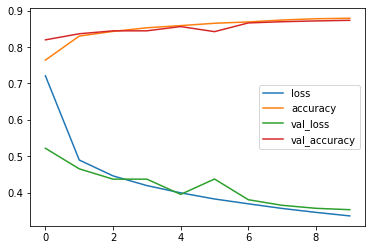

In [9]:
#history 활용
#그림 그리기
#X축 에포크
#학습곡선이라고 부름
pd.DataFrame(history.history).plot()

In [10]:
#예측방법
#결과가 값이 10개씩 있음 -> 각 범주에 속할 확률을 의미
#즉 가장 큰 값의 번호를 찾기
model.predict(X_test[:3])

array([[1.45476706e-05, 1.08958675e-05, 4.47854545e-05, 4.32759480e-05,
        9.41227518e-06, 3.58690359e-02, 3.62593746e-05, 5.40849306e-02,
        2.07741489e-03, 9.07809496e-01],
       [8.24141898e-05, 1.25935287e-07, 9.90806520e-01, 5.67130564e-06,
        3.06639541e-03, 3.27337646e-09, 6.01057662e-03, 3.56658938e-11,
        2.83639147e-05, 1.91847360e-09],
       [1.99349088e-05, 9.99962807e-01, 7.45646958e-07, 1.15368239e-05,
        4.37261224e-06, 2.38752684e-10, 2.20468323e-07, 1.19293844e-07,
        2.97997929e-07, 5.45368284e-09]], dtype=float32)

In [11]:
np.argmax(model.predict(X_test[:3]),axis=1) #예측값

array([9, 2, 1], dtype=int64)

In [12]:
y_test[:3] #진짜 값

array([9, 2, 1], dtype=uint8)

In [13]:
#정확도
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 364us/step - loss: 0.3754 - accuracy: 0.8640


[0.37538033723831177, 0.8640000224113464]

In [14]:
p=np.argmax(model.predict(X_test),axis=1) #confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test,p) #대각선을 정확하게 맞친것

array([[850,   0,  13,  40,   3,   4,  71,   0,  19,   0],
       [  3, 967,   0,  23,   3,   0,   3,   0,   1,   0],
       [ 19,   1, 801,  16,  96,   1,  56,   0,  10,   0],
       [ 29,  10,  11, 901,  22,   0,  20,   0,   7,   0],
       [  0,   0, 111,  58, 759,   0,  61,   0,  11,   0],
       [  0,   0,   0,   0,   0, 938,   1,  43,   2,  16],
       [172,   1, 109,  44,  80,   0, 564,   0,  30,   0],
       [  0,   0,   0,   0,   0,  26,   0, 942,   0,  32],
       [  3,   1,   3,   9,   2,   2,   3,   7, 970,   0],
       [  0,   0,   0,   0,   0,   8,   0,  43,   1, 948]], dtype=int64)